# Import Libraries

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tf.keras.utils import to_categorical
from tf.keras.models import load_model
import matplotlib.pyplot as plt

# Loading data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


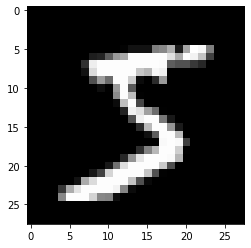

In [ ]:
plt.imshow(X_train[0], cmap="gray")

In [ ]:
print (y_train[0])

5


Shape of the data

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


## Reshaping data to feed to the model

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# One-Hot encoding of labels

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Building

In [ ]:
model = Sequential()

## Define and Initialize the model layers

In [ ]:
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model

In [ ]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

# Model Compilation

Using Adam optimizer

Accuracy is the appropriate evaluation metric.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training and Validation

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 14s 6ms/step - loss: 0.9682 - accuracy: 0.7557 - val_loss: 0.1297 - val_accuracy: 0.9599
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2922 - accuracy: 0.9134 - val_loss: 0.0755 - val_accuracy: 0.9763
Epoch 3/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2249 - accuracy: 0.9334 - val_loss: 0.0655 - val_accuracy: 0.9798
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1909 - accuracy: 0.9444 - val_loss: 0.0588 - val_accuracy: 0.9810
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1633 - accuracy: 0.9524 - val_loss: 0.0572 - val_accuracy: 0.9814
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1501 - accuracy: 0.9560 - val_loss: 0.0445 - val_accuracy: 0.9864


## Model Training Plot

Accuracy

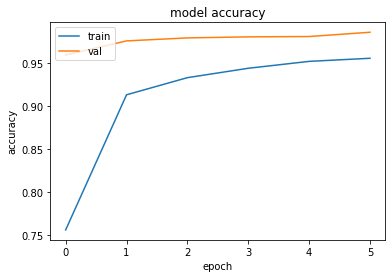

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss

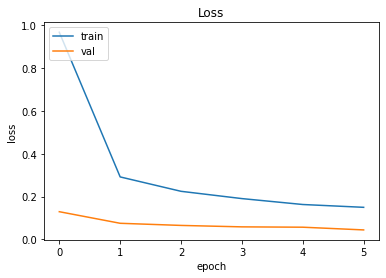

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As we can observe, a high level of validation accuracy is reached within a small number of epochs

# Tuning the model

## Adding more convolutional layers

In [ ]:
# Building model
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(32, kernel_size=3, activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(32, kernel_size=3, activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# Defining Callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting to the model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=callbacks)

Epoch 1/15
1875/1875 [==============================] - 18s 5ms/step - loss: 1.8387 - accuracy: 0.3341 - val_loss: 0.9280 - val_accuracy: 0.6674
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8586 - accuracy: 0.7091 - val_loss: 0.2992 - val_accuracy: 0.9387
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6065 - accuracy: 0.8105 - val_loss: 0.2260 - val_accuracy: 0.9581
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5067 - accuracy: 0.8443 - val_loss: 0.1800 - val_accuracy: 0.9631
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4456 - accuracy: 0.8678 - val_loss: 0.1680 - val_accuracy: 0.9648
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4046 - accuracy: 0.8835 - val_loss: 0.1739 - val_accuracy: 0.9660
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3858 - accuracy: 0.8876 - val_loss: 0.1562 - val_accurac

## Increasing number of filters

In [ ]:
# Building model
model3 = Sequential()

model3.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(64, kernel_size=3, activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

# Defining Callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting to the model
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=callbacks)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6346 - accuracy: 0.8424 - val_loss: 0.0829 - val_accuracy: 0.9728
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2235 - accuracy: 0.9360 - val_loss: 0.0629 - val_accuracy: 0.9806
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1705 - accuracy: 0.9504 - val_loss: 0.0665 - val_accuracy: 0.9807
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1423 - accuracy: 0.9589 - val_loss: 0.0586 - val_accuracy: 0.9810
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1322 - accuracy: 0.9622 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1199 - accuracy: 0.9666 - val_loss: 0.0456 - val_accuracy: 0.9853
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1112 - accuracy: 0.9678 - val_loss: 0.0435 - val_accuracy:

## Reducing Dropout and Increasing nodes in Dense Layer

In [ ]:
# Building model
model4 = Sequential()

model4.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(64, kernel_size=3, activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.3))
model4.add(Flatten())
model4.add(Dense(256, activation="relu"))
model4.add(Dropout(0.3))
model4.add(Dense(10, activation='softmax'))

# Defining Callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting to the model
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=callbacks)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3059 - accuracy: 0.9273 - val_loss: 0.0706 - val_accuracy: 0.9754
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9673 - val_loss: 0.0543 - val_accuracy: 0.9824
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.0454 - val_accuracy: 0.9854
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0718 - accuracy: 0.9791 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9829 - val_loss: 0.0365 - val_accuracy:

This model achieves the highest validation accuracy. So we save and use this model for the prediction purpose.

In [ ]:
model4.save("Digit_Recognition.h5")

# Testing the Model

In [ ]:
model = load_model("Digit_Recognition.h5")

In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("metrics-score => test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.044535741209983826, 0.9864000082015991]


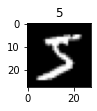

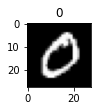

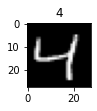

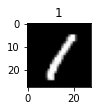

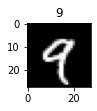

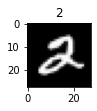

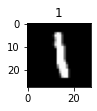

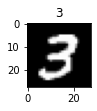

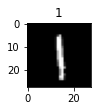

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.title(np.argmax(y_train[i]))
  plt.show()

# Performance Metrics

Accuracy, Precision, Recall Score are the appropriate tasks for the prediction task.

In [ ]:
test_predictions = np.argmax(model.predict(X_test), axis=1)

print(len(test_predictions))

313/313 [==============================] - 1s 3ms/step
10000


In [ ]:
test_labels = np.argmax(y_test, axis = 1)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Accuracy

In [ ]:
print(accuracy_score(test_labels, test_predictions))

0.9906


Recall

In [ ]:
print(recall_score(test_labels, test_predictions, average='weighted'))

0.9906


F1 score

In [ ]:
print(f1_score(test_labels, test_predictions, average='weighted'))

0.9906029544489391


Classification Report

In [ ]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

